In [1]:
# Importa bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.signal import argrelextrema

In [2]:
# abrimos el archivo y obtenemos las columnas que nos itneresan
# Se baso en la siguiente pagina web: https://realpython.com/python-csv/
def leer_archivo(nombre):
    xx = np.zeros(80)
    yy = np.zeros(80)
    l3 = np.zeros(80)
    
    with open(nombre) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if row[2]!= '':
                l3[line_count] = row[2] #Conocemos a priori columna correcta
            else:
                l3[line_count] = 0
                
            xx[line_count] = row[0] #Conocemos a priori columna correcta
            yy[line_count] = row[4] #Conocemos a priori columna correcta
                
            line_count += 1

    return [xx, yy, l3]

In [3]:
xx, yy, l3 = leer_archivo('Covid19_mex_esp.csv')

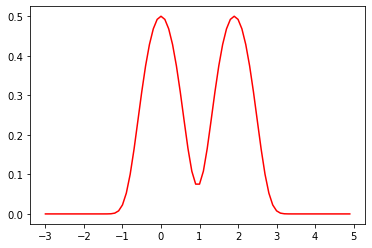

In [4]:
plt.plot(xx, yy, color = "red")
plt.show()

In [5]:
# Guarda un archivo formato .txt con los valores de xx y yy
name = 'senal_teorica.txt'
fid2 = open(name,"w") #Opens text file in writing mode https://www.tutorialspoint.com/python/python_files_io.htm
for i in range(0, len(xx)): # Cycle for each one of the float elements (numbers) of the neuronal_traces file
    entry = str(xx[i])+" "+str(yy[i])+"\n"
    fid2.write(entry) #Saves the time if we are in the first column
fid2.close()

In [6]:
# Obtener las deltas, i.e. escala adecuada en el eje x
a = argrelextrema(yy, np.greater) #Obtiene los valores maximos

if len(a[0]) == 1:
    print("Solamente hay un maximo.")

else:
    max1, max2 = a[0]

    print(xx[max2] - xx[max1]) #Imprime la diferencia entre estos dos maximos

    delta_e = (xx[len(xx)-1]-xx[0])/len(xx)
    print(delta_e)

1.9
0.09875


In [7]:
#Generando un vector con la se;al trasladada 1 vez
def trasladar(ys, n):
    # delta = xs[n]
    tam = len(ys) + n
    y_new = np.zeros(tam)
    
    for i in range( 0, tam ):
        if i < len(ys):
            y_new[i] += ys[i]
        if i >= n:
            y_new[i] += -ys[i-n]
    return y_new    

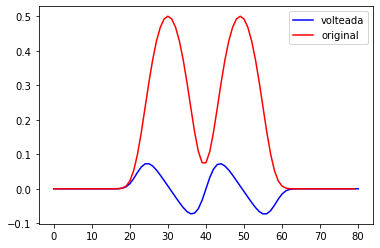

In [26]:
n = 1
y_new = trasladar(yy, n)

plt.plot(y_new, color = "blue", label = "volteada")
plt.plot(yy, color ="red", label = "original")
plt.legend()
plt.show()

In [9]:
def aplicar(x, y, m):
    # El tama;o de x tiene que ser del tama;o de y mas m
    #x y y son arreglos
    x_new = np.copy(x)
    for i in range(0, len(y)):
        x_new[m+i] += y[i]
    return x_new

In [10]:
def convolucion(yy, n = 40, m = 64): #que n va de 1 hasta 64
    tamano = len(yy)
    ceros = np.zeros(tamano+n*m)
    y_new = trasladar(yy, n)

    for i in range(0, m):
        ceros = aplicar(ceros, (-1)**i*yy, n*i)
    return ceros

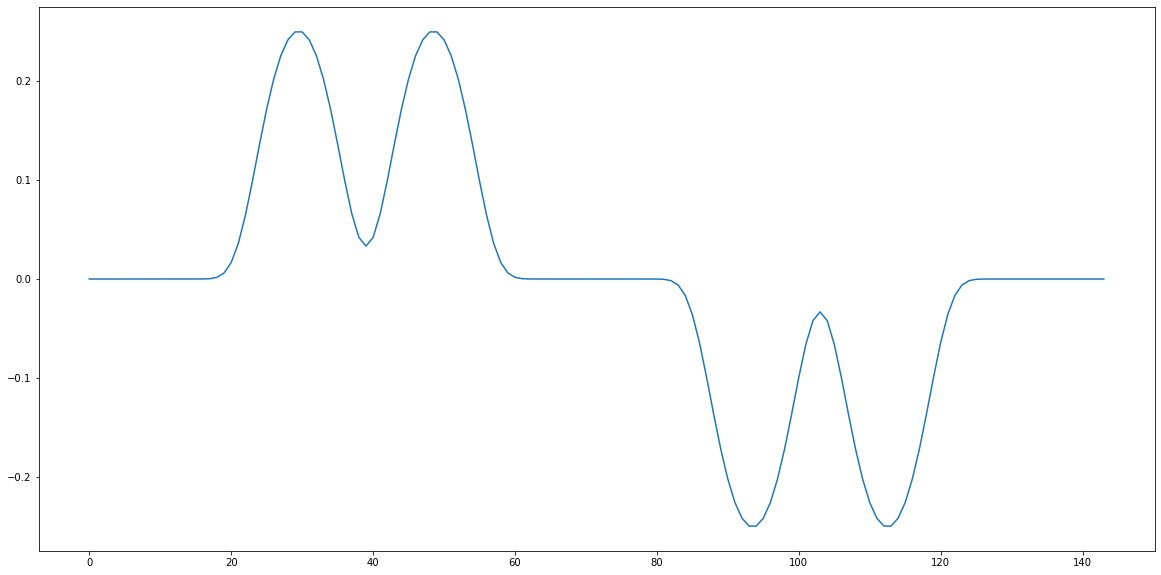

In [25]:
ceros = convolucion(yy, 1, 64)
plt.figure(figsize=(20,10))
plt.plot(ceros)
plt.show()

In [12]:
#Input: yy
def integrar(yy, intervalo = 60, m = 8):
    #intervalo es el maximo valor de las n
    
    integrs = np.zeros(intervalo)
    
    for i in range(1, intervalo):
        y_new = convolucion(yy, i, m)
        integral = sum(abs(y_new))
        integrs[i] = integral
    return integrs

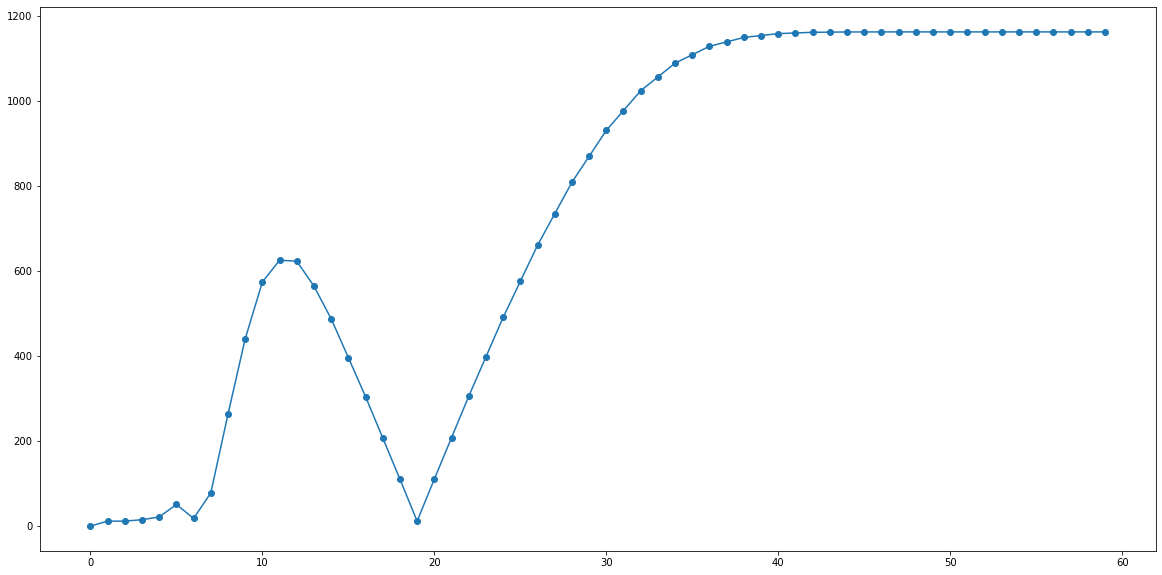

valores maximos en: [ 6 19]


In [28]:
intervalo = 60
m = 100
integrs = integrar(yy, intervalo, m)

plt.figure(figsize=(20,10))
plt.plot(integrs, marker = 'o')
plt.show()

print("valores maximos en: "+str(argrelextrema(integrs, np.less)[0]))

In [14]:
maximo = max(argrelextrema(integrs, np.less)[0])
print(maximo*delta_e)

# Note que el valor anterior debe corresponder con la diferencia entre los dos maximos originales
print(xx[max2] - xx[max1])

1.8762500000000002
1.9
